# fired dataset 

In [1]:
# Imports
import os
import sys
BASE_DIR = os.path.dirname(os.getcwd())
sys.path.append(BASE_DIR)
import torch
import numpy as np
import pandas as pd

# Opendataval
from dataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise
from dataval.datavaluation import NDDV, NDSV
from dataval.experiment import ExperimentMediator

import warnings
warnings.filterwarnings("ignore")

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
DataFetcher.datasets_available()

{'2dplanes',
 'MiniBooNE',
 'adult',
 'bbc',
 'bbc-embeddings',
 'breast_cancer',
 'challenge-iris',
 'cifar10',
 'cifar10-embeddings',
 'cifar100',
 'cifar100-embeddings',
 'creditcard',
 'diabetes',
 'digits',
 'echoMonths',
 'election',
 'electricity',
 'fashion',
 'fmnist-embeddings',
 'fried',
 'gaussian_classifier',
 'gaussian_classifier_high_dim',
 'imdb',
 'imdb-embeddings',
 'iris',
 'linnerud',
 'lowbwt',
 'mnist',
 'mnist-embeddings',
 'mv',
 'nomao',
 'pol',
 'stl10-embeddings',
 'stock',
 'svhn-embeddings',
 'vehicle_sensIT',
 'wave_energy',
 'webdata_wXa'}

## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: adult
- Model: sklearn's logistic regression model
- Metric: Classification accuracy

In [3]:
dataset_name = "fried"
train_count, valid_count, test_count, meta_count = 1000, 100, 300, 100
# noise_rate = 0.05
# noise_rate = 0.1
# noise_rate = 0.2
noise_rate = 0.3
# noise_rate = 0.4
# noise_rate = 0.45
noise_kwargs = {'noise_rate': noise_rate}
max_epoch = 3
batch_size = 32
lr = 0.01
random_state = 42
train_kwargs = {"epochs": max_epoch, "batch_size": batch_size, "lr": lr}
model_name = "classifiermlp"   # "sklogreg"
# model_name = "LogisticRegression"
metric_name = "accuracy"
cache_dir = "../data_files/"
add_noise = add_gauss_noise
noise_type = "gauss_noise"
device = 'cpu'

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir=cache_dir,  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    meta_count=meta_count,
    add_noise=add_noise, 
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    random_state = random_state,
    model_name=model_name,
    metric_name=metric_name,
    device=device
)

Base line model metric_name='accuracy': perf=0.8333333134651184


A full list of registered datasets can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/dataloader/fetcher.py#L121). A list of available  prediction models can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/model/__init__.py#L111).

## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [4]:
data_evaluators = [NDSV(mfg_epochs=50, base_model=model_name, meta_interval=4, Ntime=2, batch_size=batch_size, weight_decay=3e-4, meta_weight_decay=1e-4, meta_hidden_size=100, interpret=True,kernel='Matern52',hidden_dim=100)] 

In [5]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

Interpretation NDDV model


  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:01<01:12,  1.48s/it]

Epoch: 0, Test Accuracy: 65.00%


  4%|▍         | 2/50 [00:02<01:08,  1.42s/it]

Epoch: 1, Test Accuracy: 80.00%


  6%|▌         | 3/50 [00:04<01:08,  1.46s/it]

Epoch: 2, Test Accuracy: 75.00%


  8%|▊         | 4/50 [00:06<01:10,  1.53s/it]

Epoch: 3, Test Accuracy: 75.00%


 10%|█         | 5/50 [00:07<01:07,  1.49s/it]

Epoch: 4, Test Accuracy: 85.00%


 12%|█▏        | 6/50 [00:09<01:06,  1.52s/it]

Epoch: 5, Test Accuracy: 79.33%


 14%|█▍        | 7/50 [00:10<01:06,  1.54s/it]

Epoch: 6, Test Accuracy: 83.00%


 16%|█▌        | 8/50 [00:11<01:00,  1.43s/it]

Epoch: 7, Test Accuracy: 84.67%


 18%|█▊        | 9/50 [00:13<00:58,  1.42s/it]

Epoch: 8, Test Accuracy: 85.00%


 20%|██        | 10/50 [00:14<00:56,  1.42s/it]

Epoch: 9, Test Accuracy: 83.33%


 22%|██▏       | 11/50 [00:15<00:54,  1.41s/it]

Epoch: 10, Test Accuracy: 80.33%


 24%|██▍       | 12/50 [00:17<00:54,  1.43s/it]

Epoch: 11, Test Accuracy: 84.33%


 26%|██▌       | 13/50 [00:18<00:50,  1.35s/it]

Epoch: 12, Test Accuracy: 84.33%


 28%|██▊       | 14/50 [00:19<00:48,  1.34s/it]

Epoch: 13, Test Accuracy: 84.67%


 30%|███       | 15/50 [00:21<00:47,  1.35s/it]

Epoch: 14, Test Accuracy: 82.33%


 32%|███▏      | 16/50 [00:22<00:46,  1.37s/it]

Epoch: 15, Test Accuracy: 83.00%


 34%|███▍      | 17/50 [00:24<00:45,  1.39s/it]

Epoch: 16, Test Accuracy: 82.33%


 36%|███▌      | 18/50 [00:25<00:42,  1.34s/it]

Epoch: 17, Test Accuracy: 85.00%


 38%|███▊      | 19/50 [00:27<00:44,  1.45s/it]

Epoch: 18, Test Accuracy: 83.00%


 40%|████      | 20/50 [00:28<00:42,  1.42s/it]

Epoch: 19, Test Accuracy: 82.33%


 42%|████▏     | 21/50 [00:29<00:39,  1.35s/it]

Epoch: 20, Test Accuracy: 84.00%


 44%|████▍     | 22/50 [00:30<00:37,  1.33s/it]

Epoch: 21, Test Accuracy: 85.00%


 46%|████▌     | 23/50 [00:32<00:37,  1.38s/it]

Epoch: 22, Test Accuracy: 79.00%


 48%|████▊     | 24/50 [00:33<00:36,  1.42s/it]

Epoch: 23, Test Accuracy: 83.00%


 50%|█████     | 25/50 [00:35<00:36,  1.44s/it]

Epoch: 24, Test Accuracy: 85.67%


 52%|█████▏    | 26/50 [00:36<00:34,  1.42s/it]

Epoch: 25, Test Accuracy: 85.33%


 54%|█████▍    | 27/50 [00:38<00:33,  1.44s/it]

Epoch: 26, Test Accuracy: 85.00%


 56%|█████▌    | 28/50 [00:39<00:33,  1.51s/it]

Epoch: 27, Test Accuracy: 84.67%


 58%|█████▊    | 29/50 [00:41<00:31,  1.49s/it]

Epoch: 28, Test Accuracy: 84.67%


 60%|██████    | 30/50 [00:43<00:30,  1.55s/it]

Epoch: 29, Test Accuracy: 86.00%


 62%|██████▏   | 31/50 [00:44<00:28,  1.50s/it]

Epoch: 30, Test Accuracy: 86.67%


 64%|██████▍   | 32/50 [00:45<00:25,  1.40s/it]

Epoch: 31, Test Accuracy: 85.33%


 66%|██████▌   | 33/50 [00:47<00:24,  1.45s/it]

Epoch: 32, Test Accuracy: 85.67%


 68%|██████▊   | 34/50 [00:48<00:23,  1.49s/it]

Epoch: 33, Test Accuracy: 86.00%


 70%|███████   | 35/50 [00:50<00:21,  1.43s/it]

Epoch: 34, Test Accuracy: 85.00%


 72%|███████▏  | 36/50 [00:51<00:20,  1.45s/it]

Epoch: 35, Test Accuracy: 86.00%


 74%|███████▍  | 37/50 [00:52<00:18,  1.41s/it]

Epoch: 36, Test Accuracy: 86.00%


 76%|███████▌  | 38/50 [00:54<00:16,  1.35s/it]

Epoch: 37, Test Accuracy: 85.00%


 78%|███████▊  | 39/50 [00:55<00:14,  1.31s/it]

Epoch: 38, Test Accuracy: 85.67%


 80%|████████  | 40/50 [00:56<00:12,  1.27s/it]

Epoch: 39, Test Accuracy: 86.00%


 82%|████████▏ | 41/50 [00:57<00:11,  1.23s/it]

Epoch: 40, Test Accuracy: 86.00%


 84%|████████▍ | 42/50 [00:58<00:09,  1.24s/it]

Epoch: 41, Test Accuracy: 86.00%


 86%|████████▌ | 43/50 [01:00<00:08,  1.23s/it]

Epoch: 42, Test Accuracy: 86.00%


 88%|████████▊ | 44/50 [01:01<00:07,  1.24s/it]

Epoch: 43, Test Accuracy: 86.00%


 90%|█████████ | 45/50 [01:02<00:06,  1.24s/it]

Epoch: 44, Test Accuracy: 86.00%


 92%|█████████▏| 46/50 [01:03<00:04,  1.24s/it]

Epoch: 45, Test Accuracy: 86.00%


 94%|█████████▍| 47/50 [01:05<00:03,  1.24s/it]

Epoch: 46, Test Accuracy: 86.00%


 96%|█████████▌| 48/50 [01:06<00:02,  1.24s/it]

Epoch: 47, Test Accuracy: 86.00%


 98%|█████████▊| 49/50 [01:07<00:01,  1.24s/it]

Epoch: 48, Test Accuracy: 86.00%


100%|██████████| 50/50 [01:08<00:00,  1.38s/it]

Epoch: 49, Test Accuracy: 86.00%


Elapsed time NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100): 0:01:09.311864
CPU times: total: 3min 4s
Wall time: 1min 9s


## [Step 3] Evaluate data values

In [6]:
from dataval.experiment.exper_methods import (
    dynamic_data_state,
    dynamic_data_values,
    extract_loss,
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    remove_high_value,
    remove_low_value,
    add_low_high,
    add_high_value,
    add_low_value,
    save_dataval
)
from matplotlib import pyplot as plt

In [7]:
# Saving the results with percent 5%
percent = 0.05
output_dir = f"../results/NDDV_interp_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_interp_fried_classifiermlp_gauss_noise_noise_rate=0.3_train_count=1000_percent=0.05/'

### Noisy data detection 
- `noisy_detection` performs the noisy data detection task and evaluates the F1-score of each data valuation algorithm's prediction. The higher, the better.  
  - noisy data: mislabeled data

In [8]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.4613


### Discover noisy samples
- `discover_corrupted_sample` visualizes how well noisy data points are identified when a fraction of dataset is inspected. 

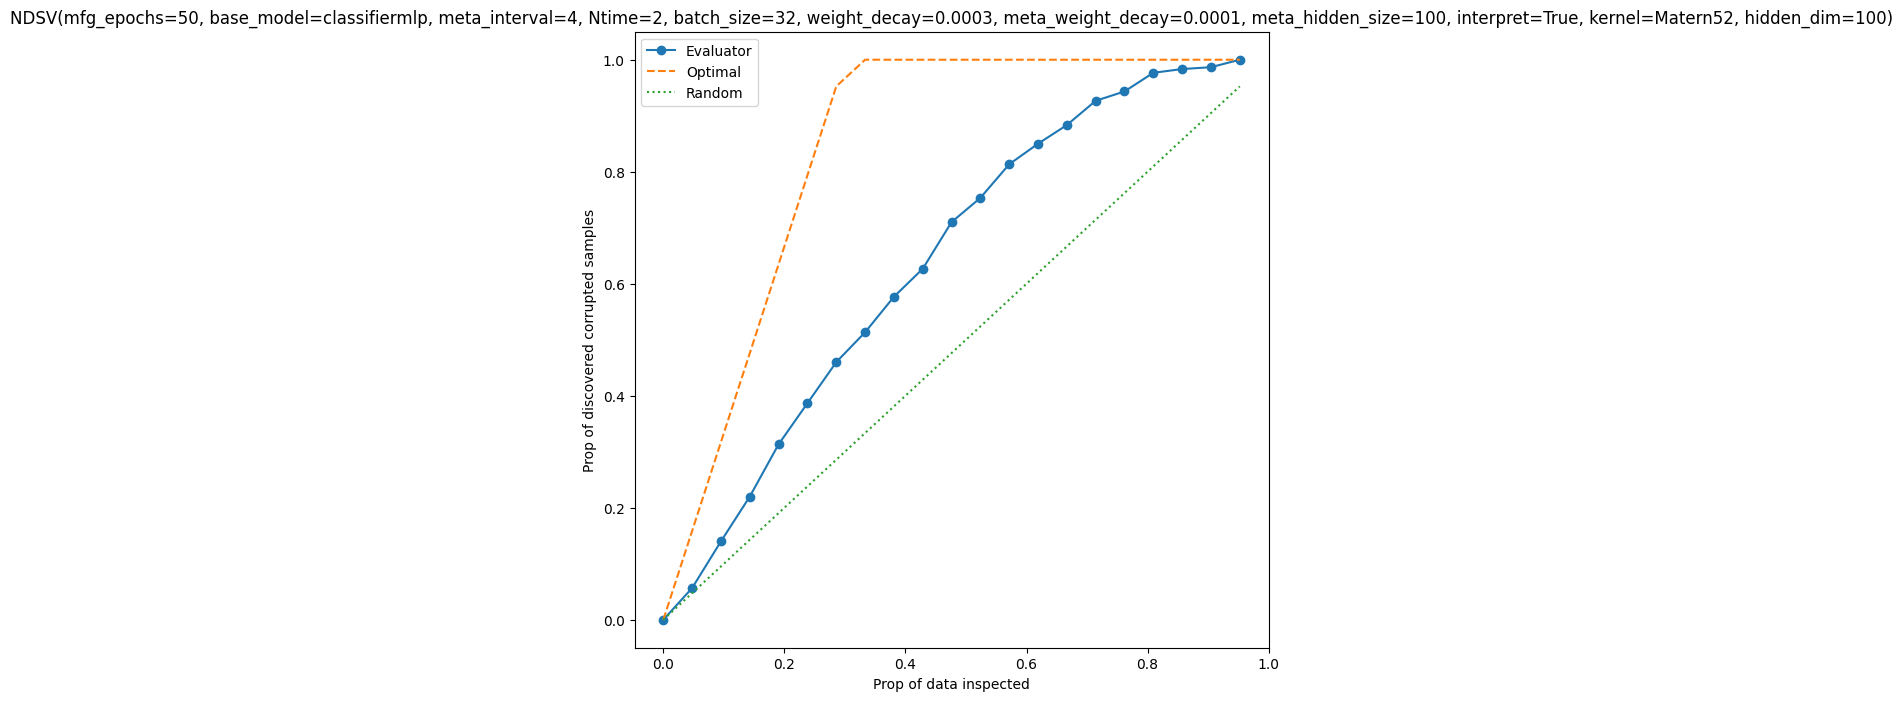

In [9]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

### Point removal experiment
- `remove_high_low` performs the point removal experiment. Each data valution algorithm, it provides two curves: one is removing data in a descending order (orange), the other is in an ascending order (blue). As for the orange (resp. blue) curve, the lower (resp. upper), the better. 

In [10]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

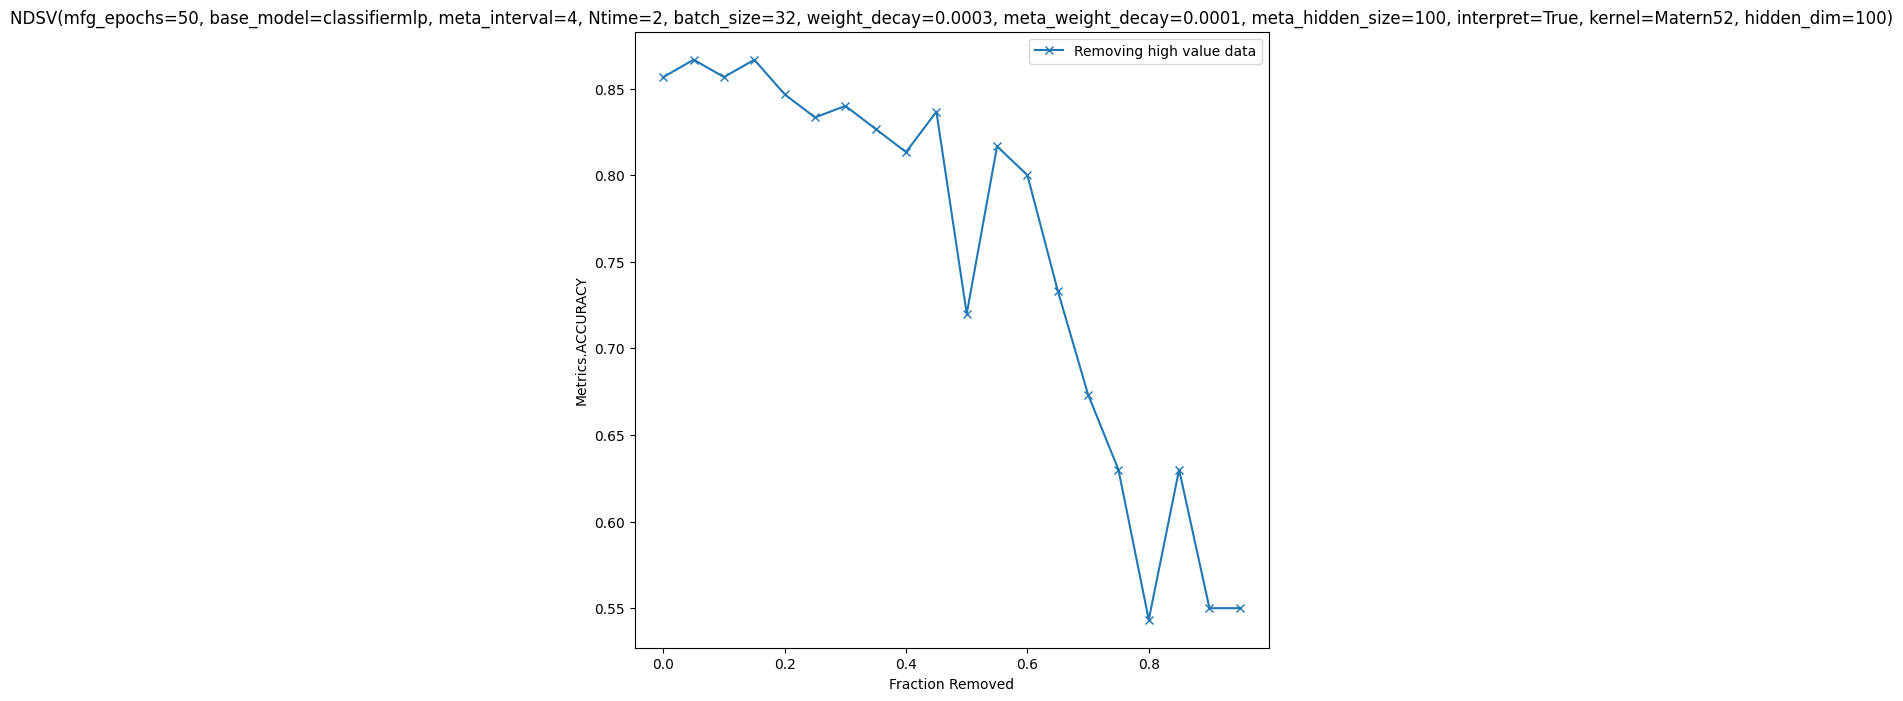

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

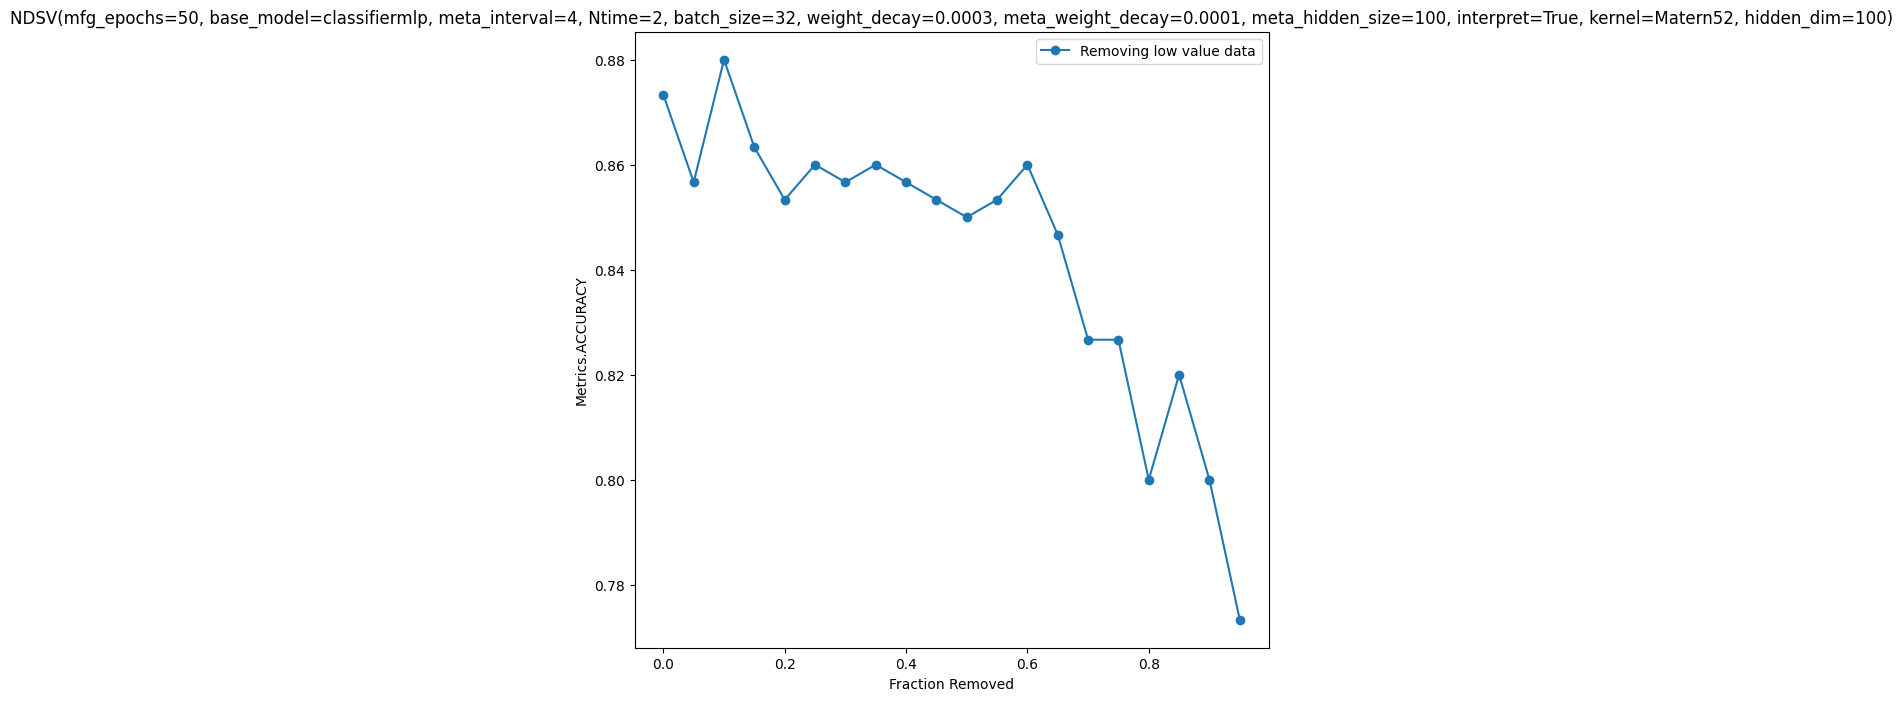

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

In [ ]:
df_resp # it provides complete information for generating point-removal experiment figures.

,remove_least_influential_first_Metrics.ACCURACY,remove_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.88,0.873333,0.0
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.866667,0.83,0.05
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.873333,0.853333,0.1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.883333,0.846667,0.15
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.826667,0.823333,0.2
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.873333,0.853333,0.25
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.85,0.846667,0.3
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.87,0.813333,0.35
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.86,0.85,0.4
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=32, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.853333,0.796667,0.45


In [ ]:
fig = plt.figure(figsize=(18, 8))
df_addp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

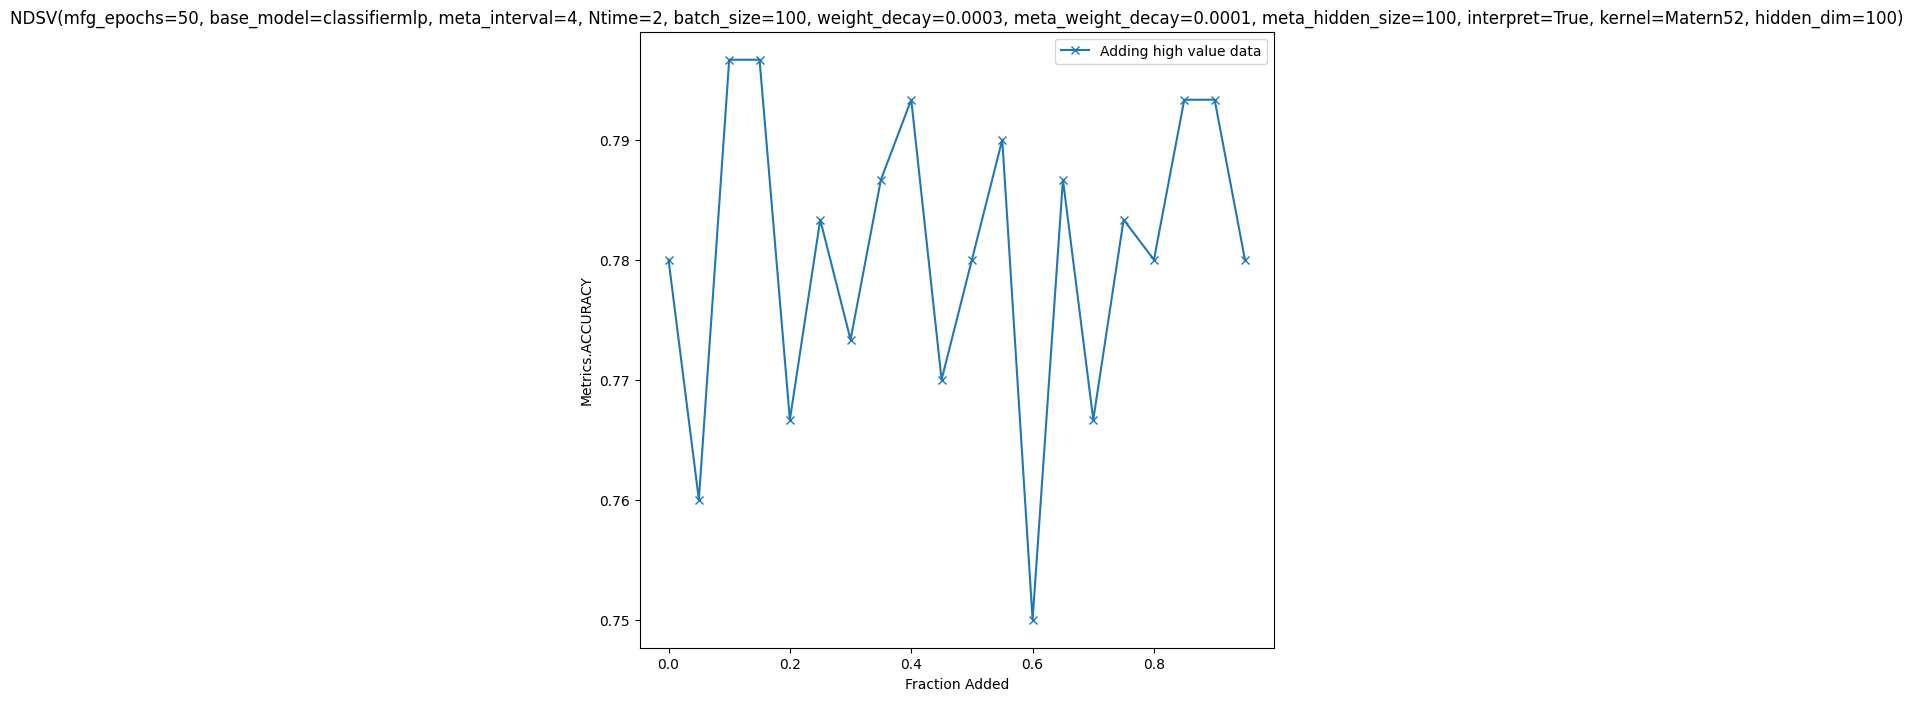

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

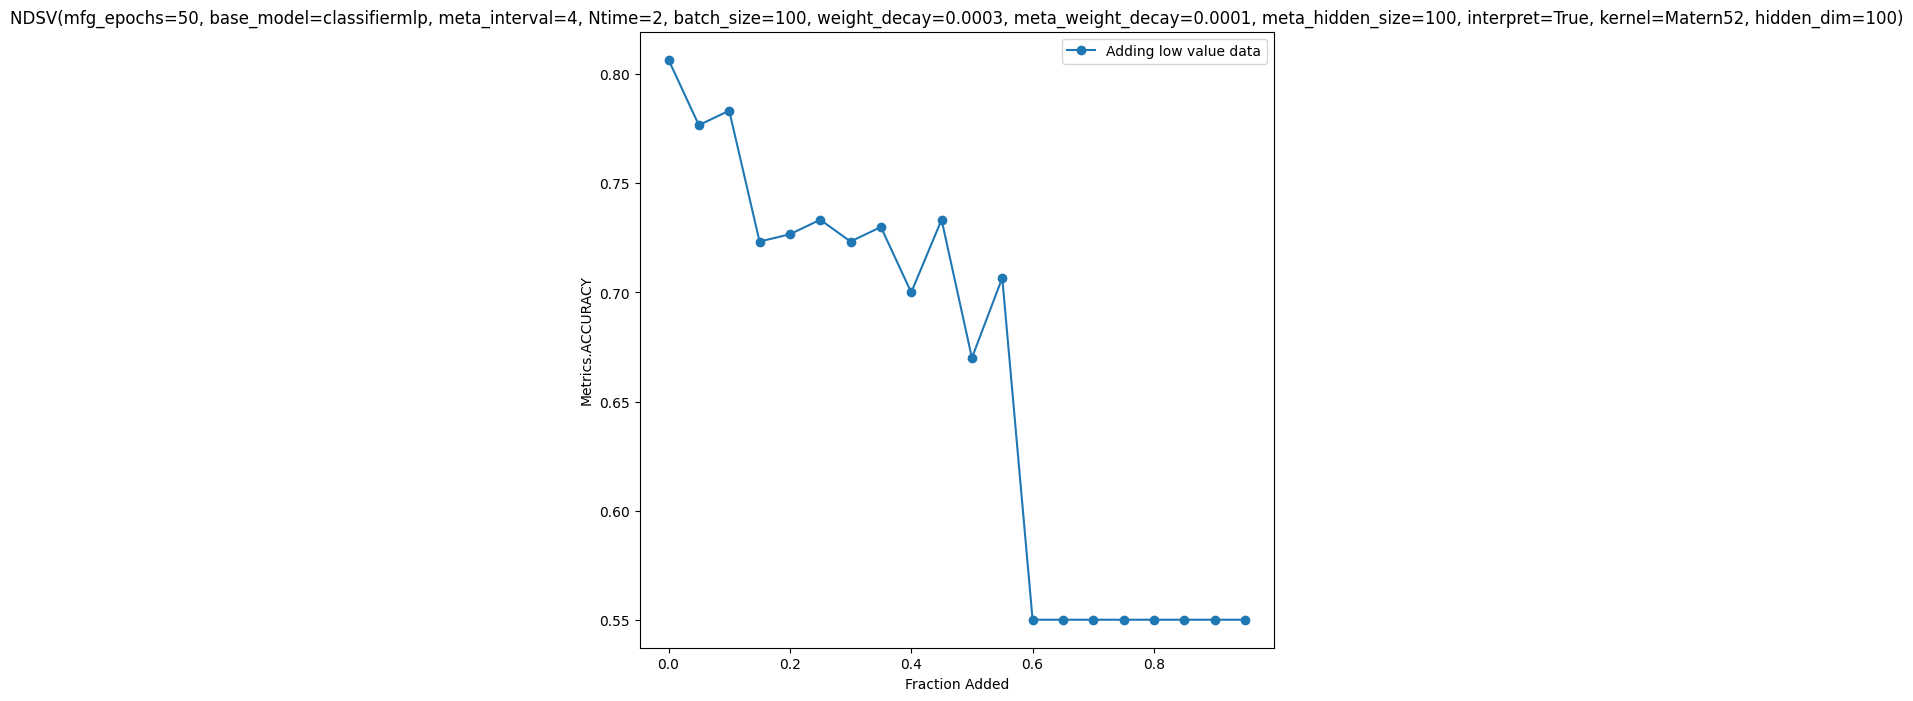

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)

In [ ]:
df_addp

,add_least_influential_first_Metrics.ACCURACY,add_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.793333,0.95
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.78,0.9
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.79,0.85
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.79,0.8
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.766667,0.75
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.773333,0.7
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.55,0.78,0.65
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.58,0.783333,0.6
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.66,0.783333,0.55
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.733333,0.773333,0.5


### Save data values
- `save_dataval` stores computed data values at `{output_dir}/save_dataval.csv`.

In [ ]:
exper_med.evaluate(save_dataval, save_output=True)

,indices,data_values
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",7323,0.000624
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",7003,-0.003216
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",29534,0.000906
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",23677,0.000329
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",29695,0.000945
...,...,...
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",24560,0.000508
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",6418,0.000884
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",15188,0.000972
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",38435,0.000982


### percent is 0.1

In [ ]:
# Saving the results with percent 10%
percent = 0.1
output_dir = f"../results/NDDV_interp_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_interp_fried_classifiermlp_gauss_noise_noise_rate=0.3_train_count=1000_percent=0.1/'

In [ ]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=2, batch_size=100, weight_decay=0.0003, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52, hidden_dim=100)",0.376033


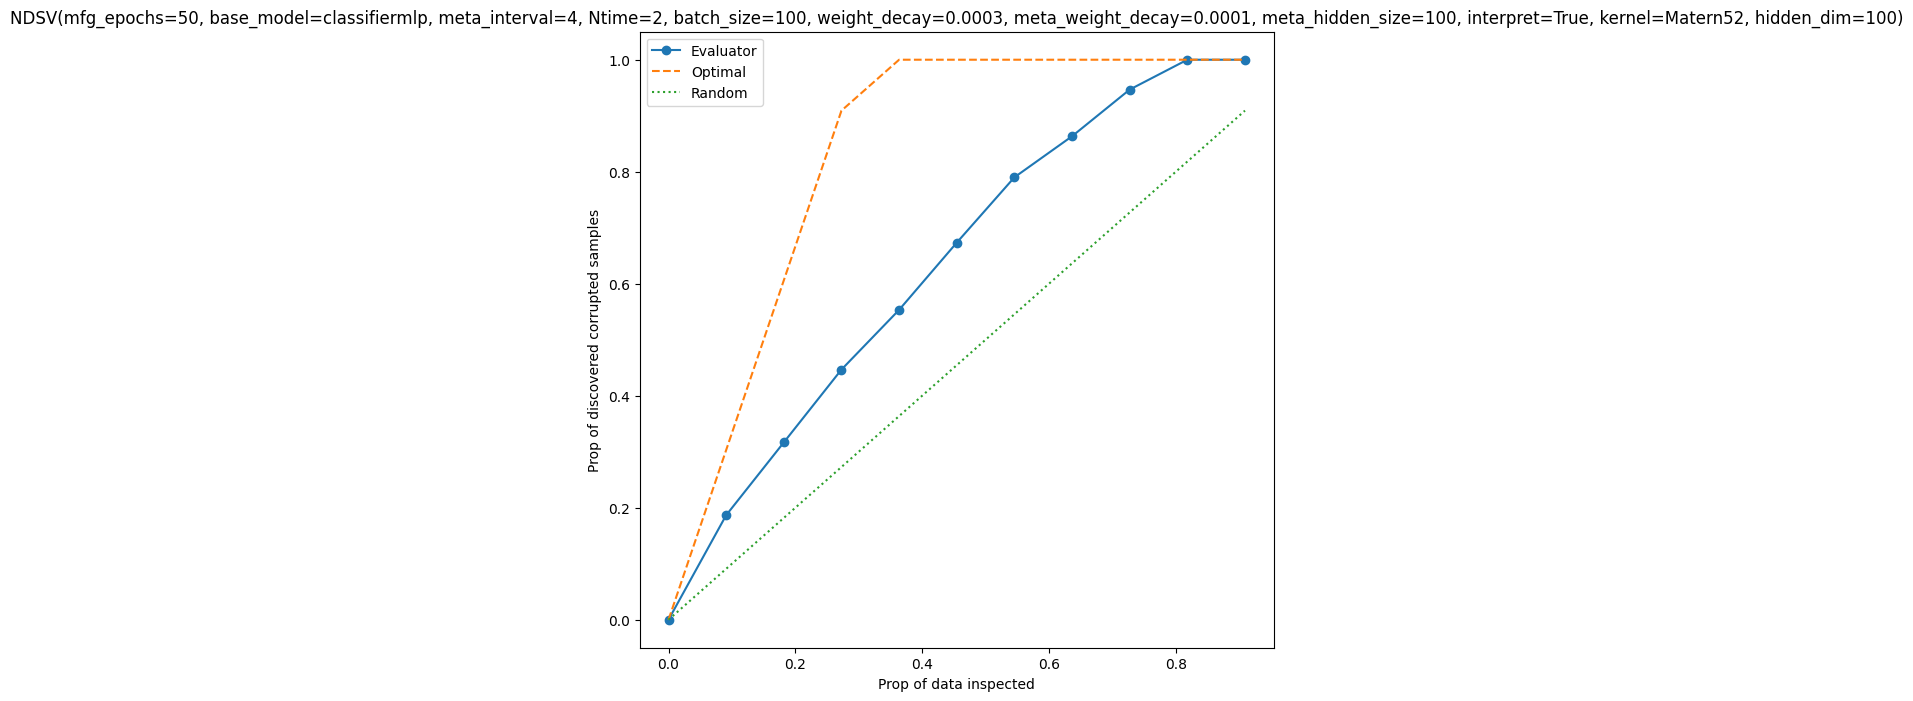

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

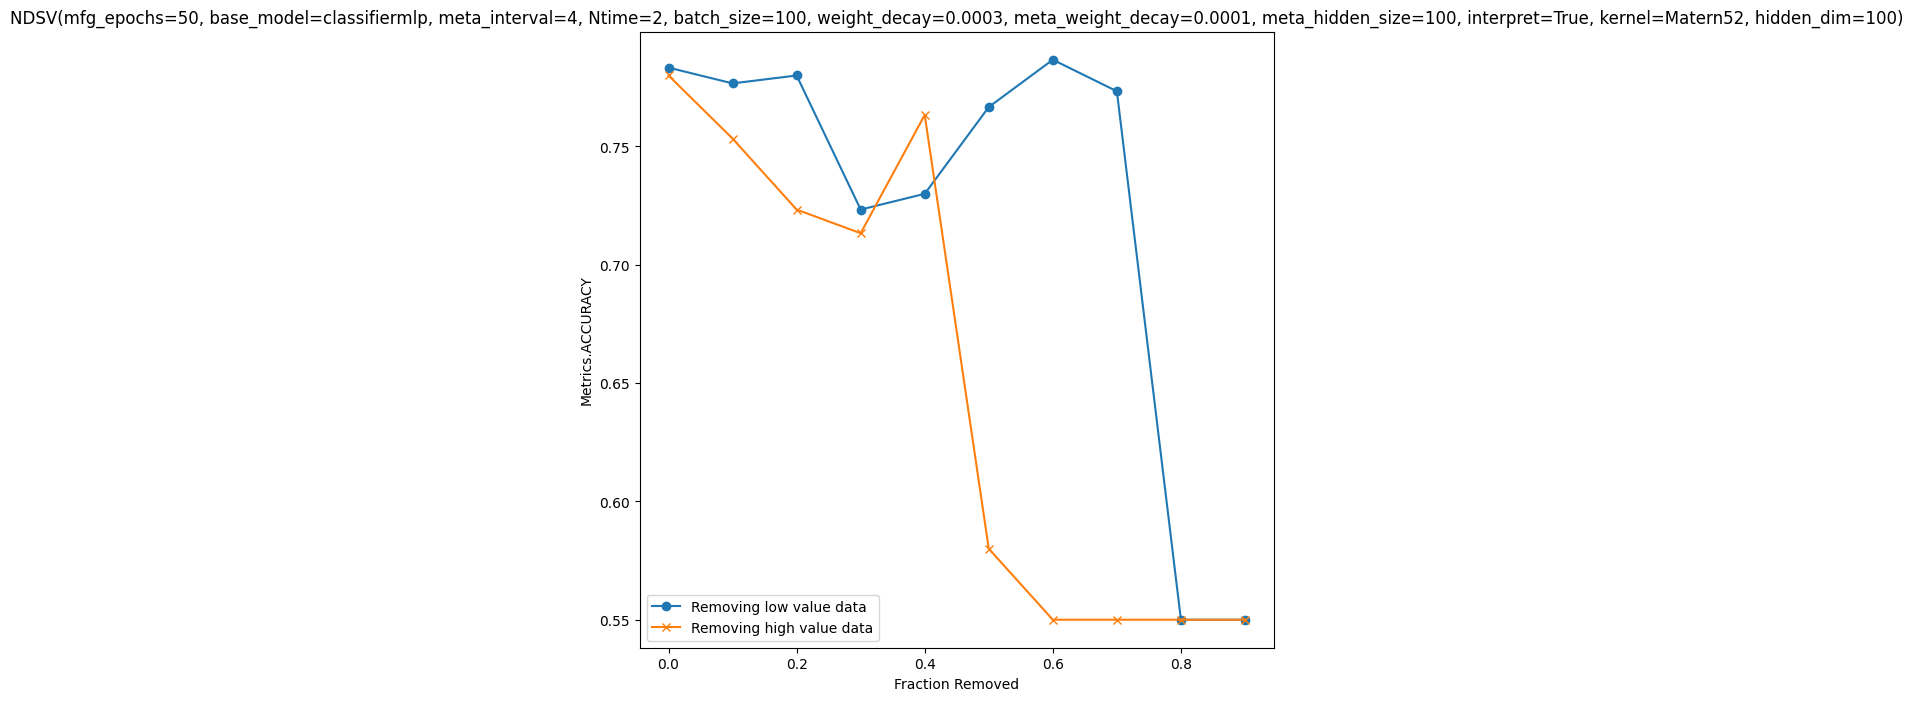

In [ ]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

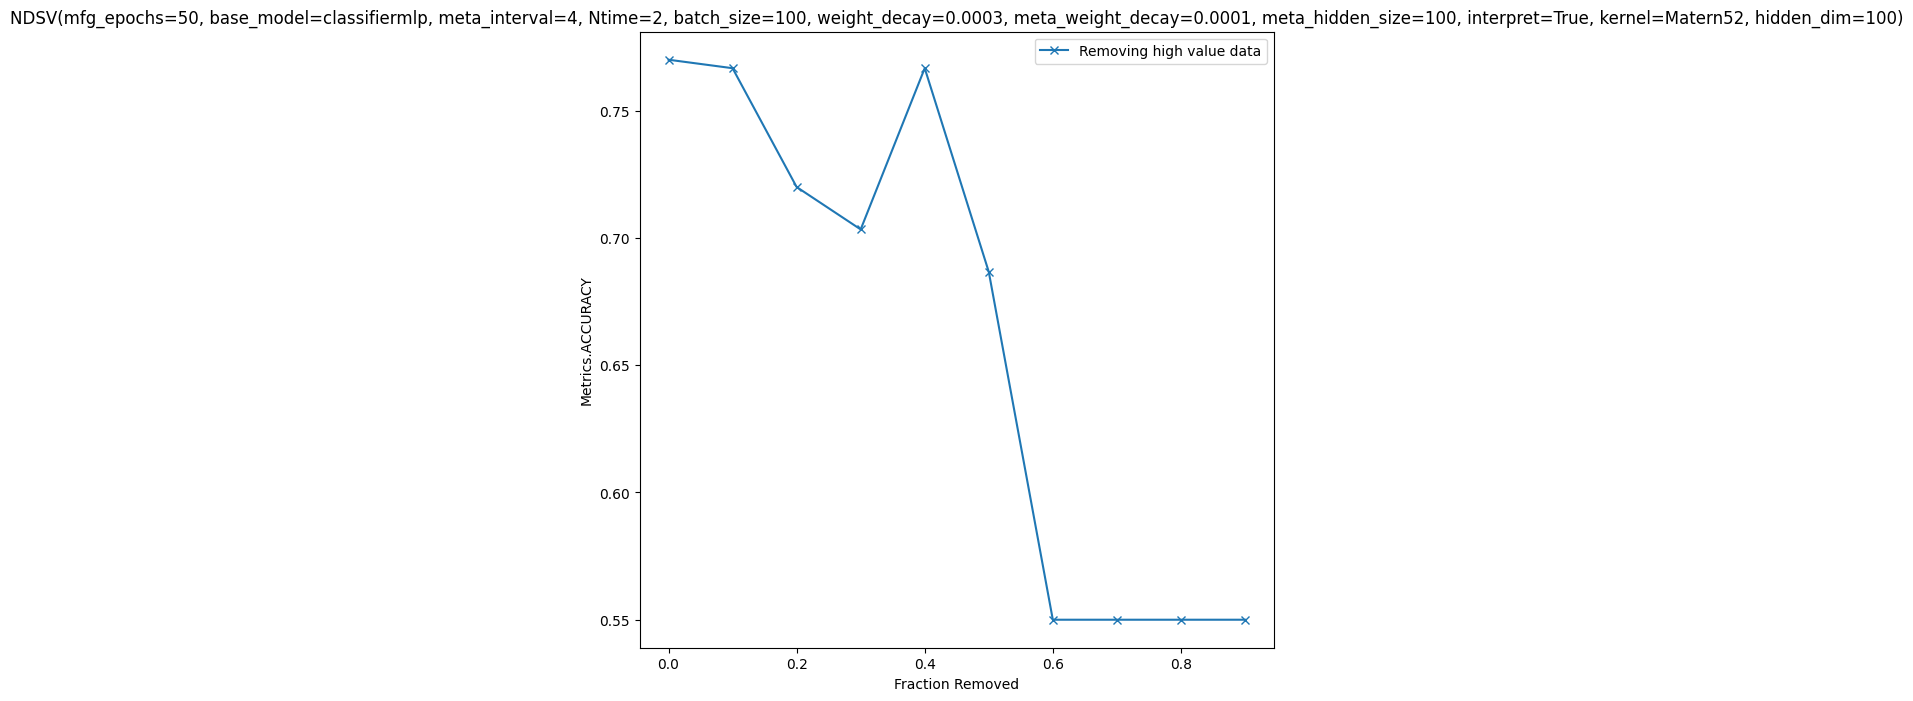

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

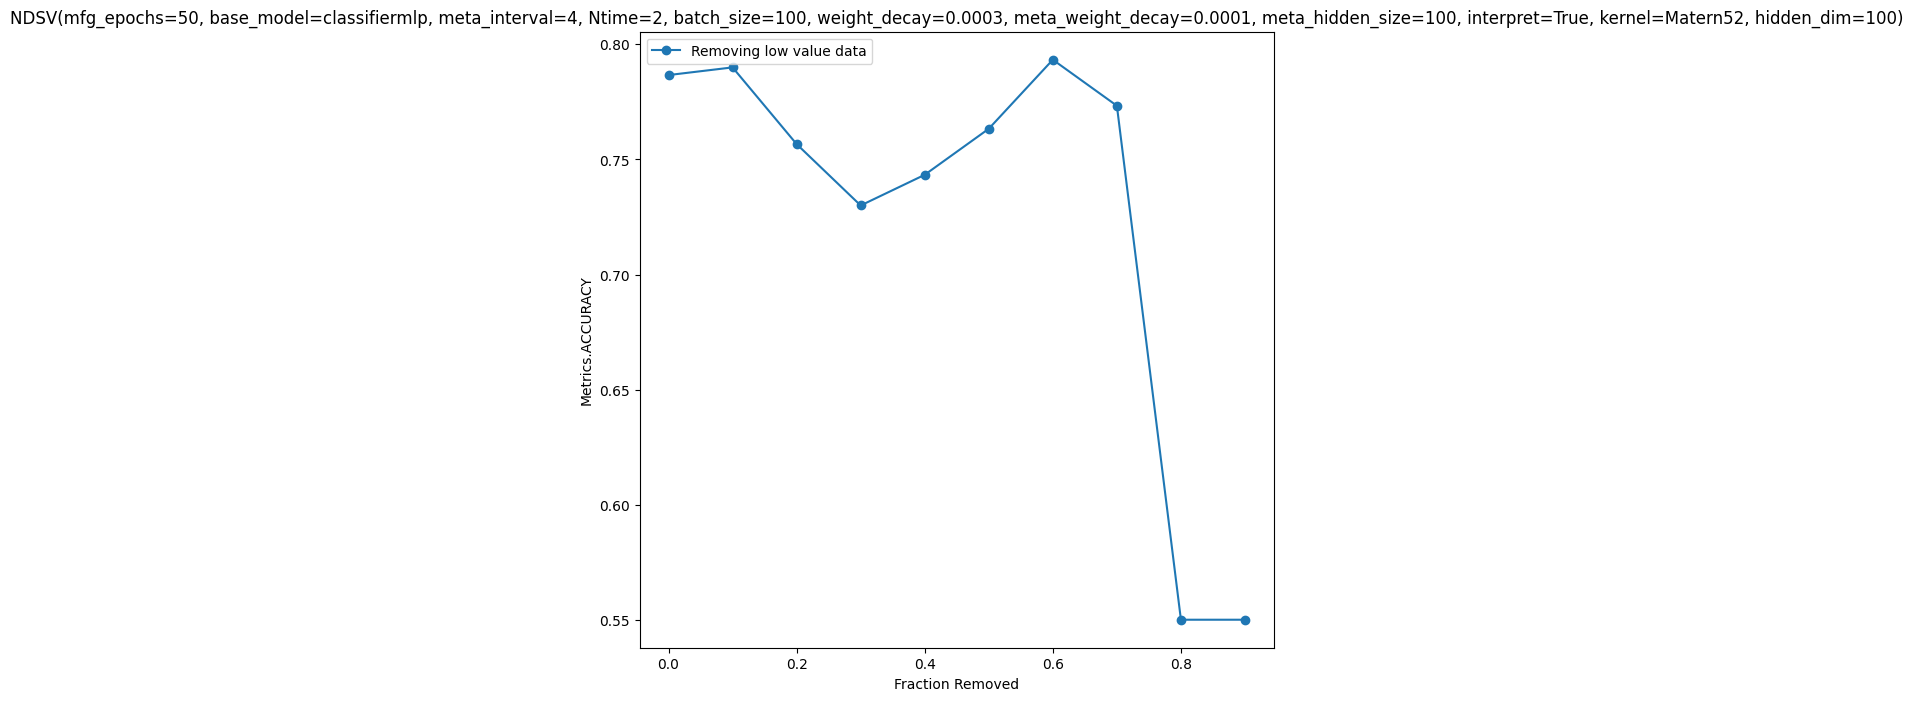

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

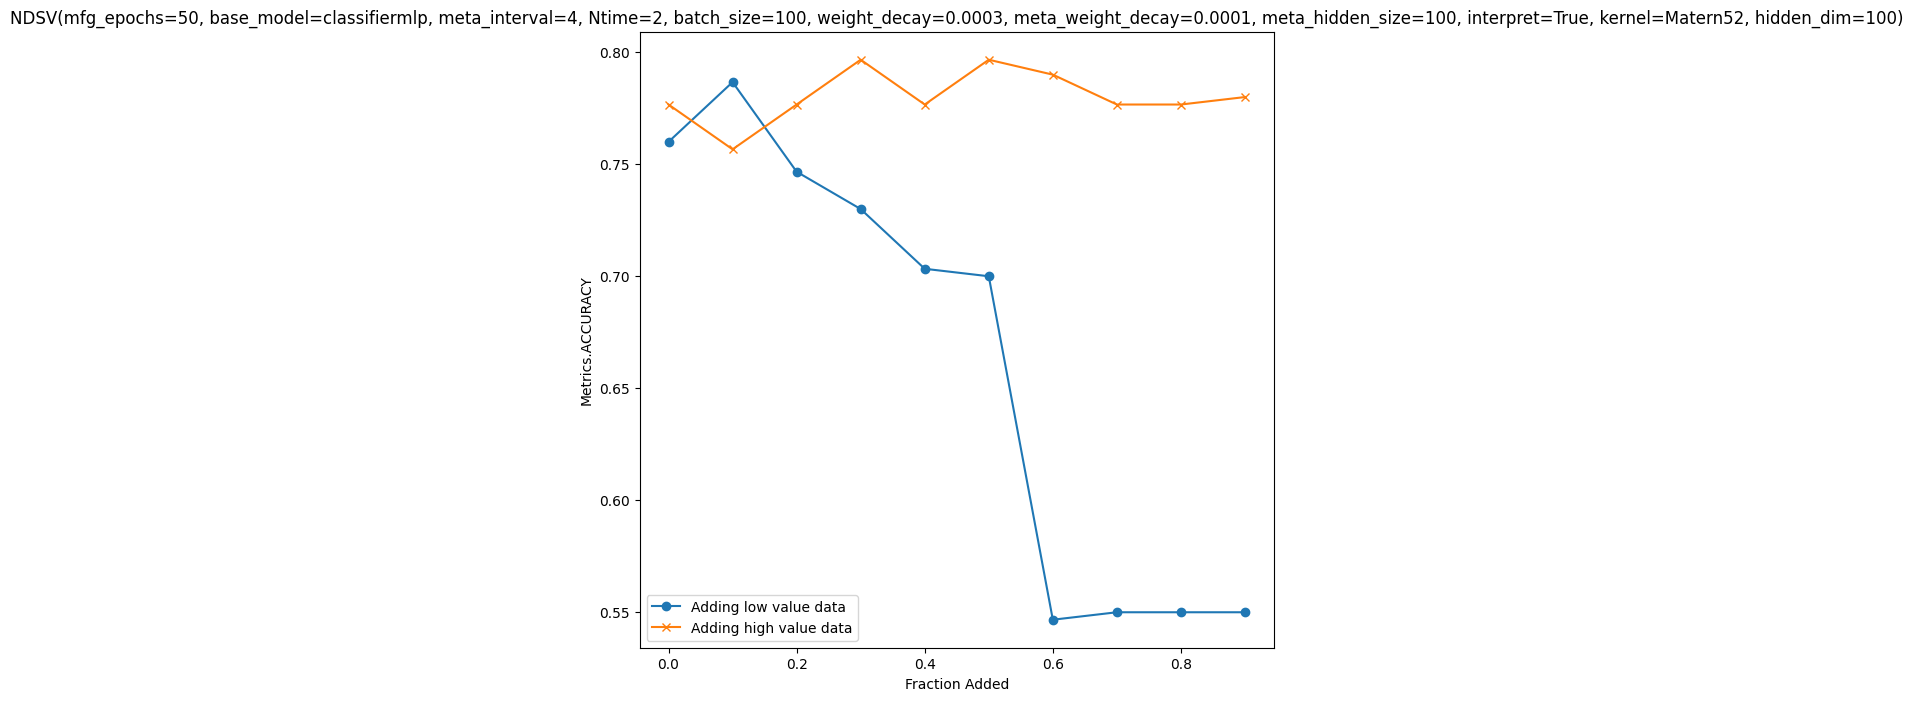

In [ ]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

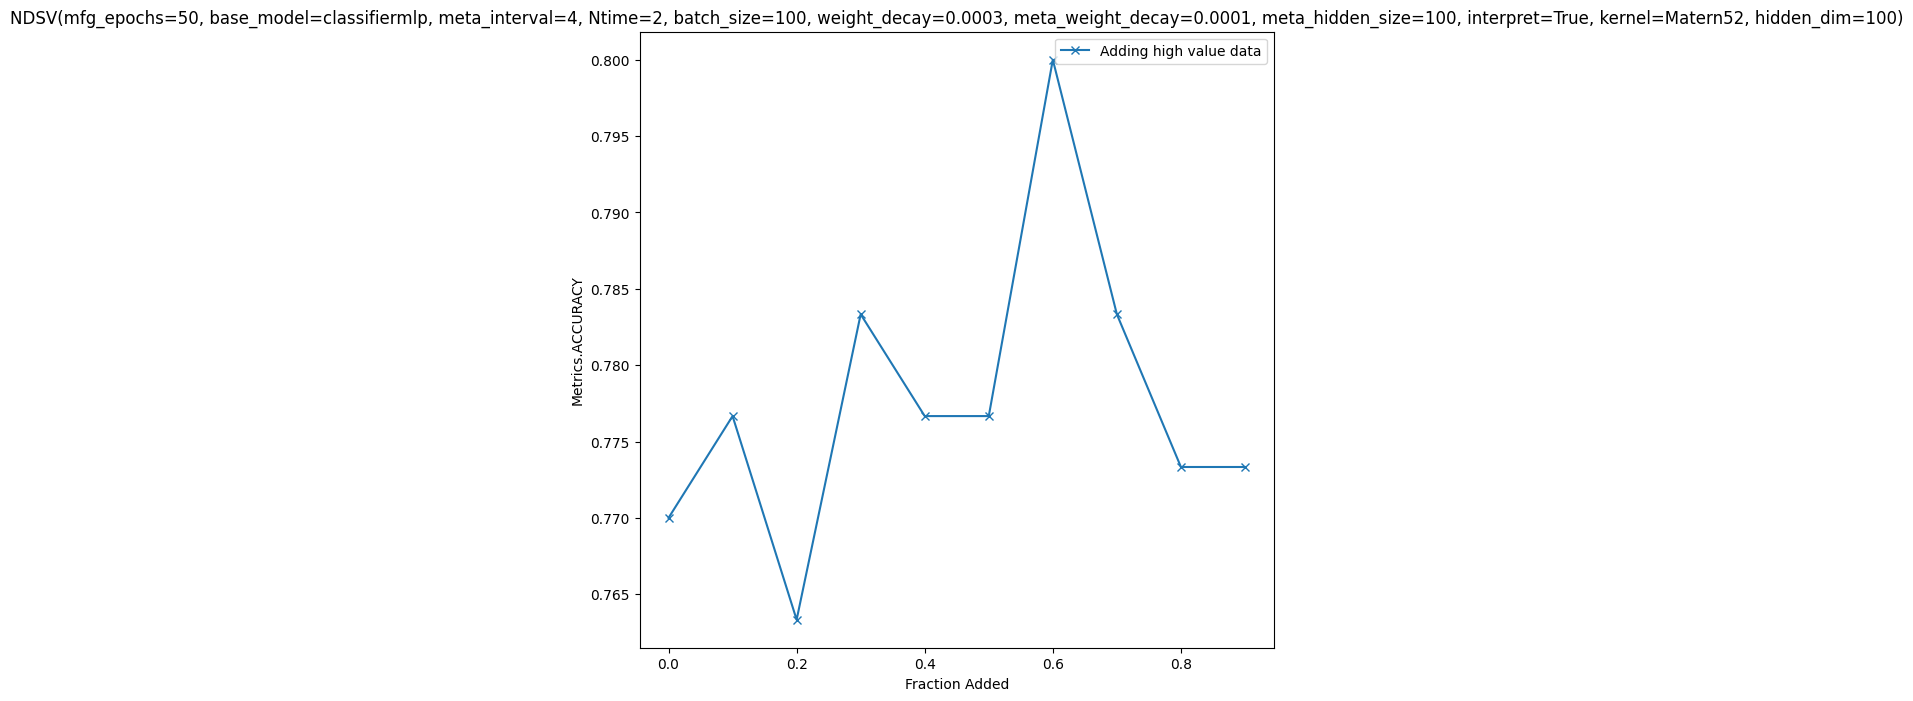

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

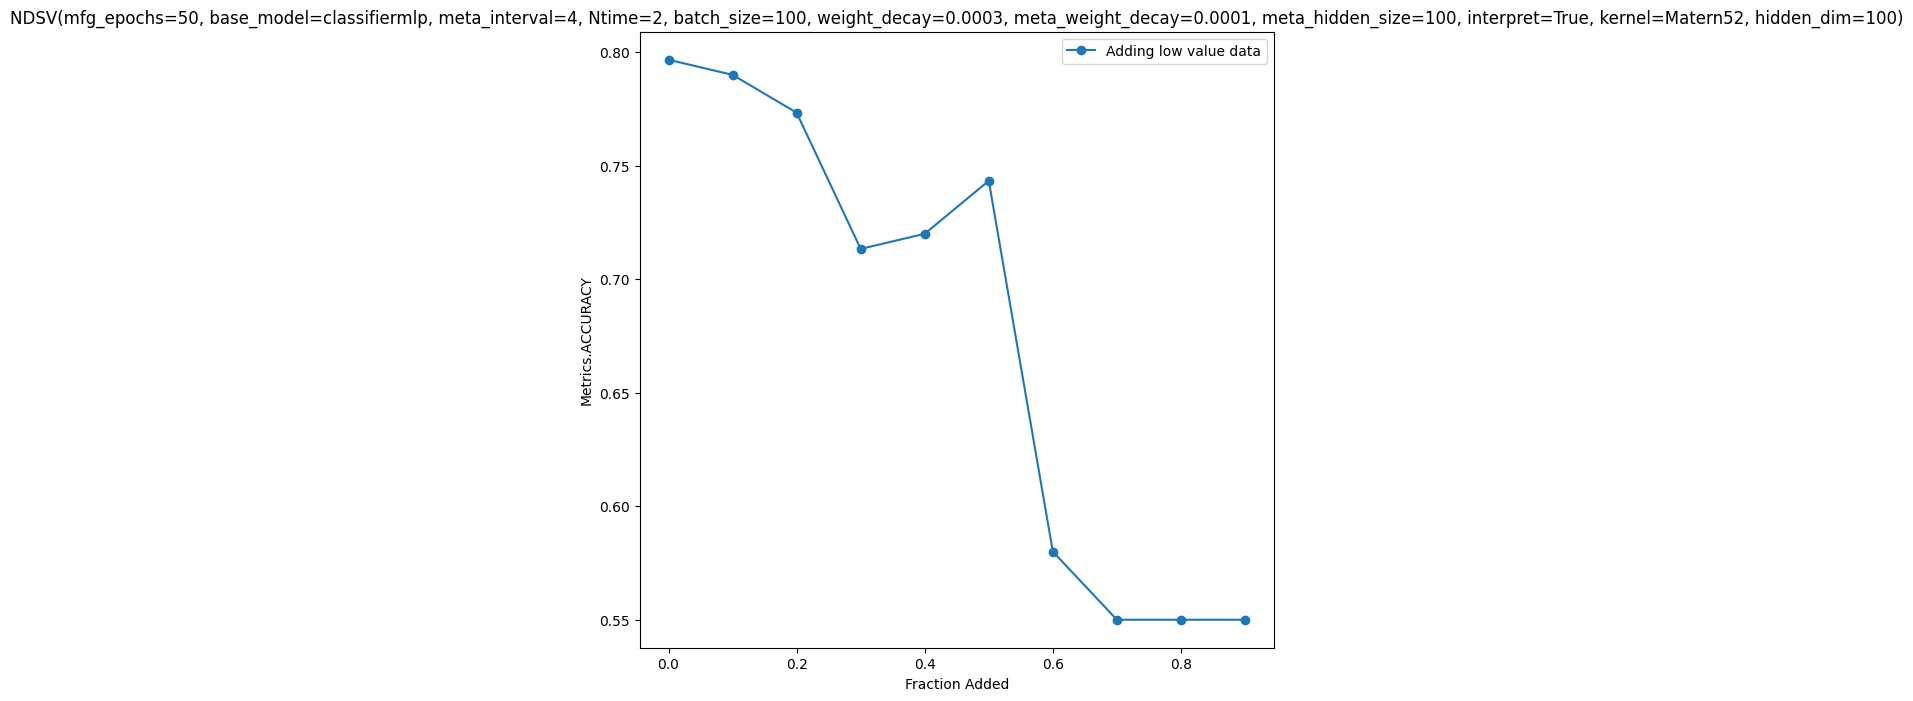

In [ ]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)